In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
info = pd.read_csv('info1.csv', encoding='utf-8')
samp_cst_feat = pd.read_csv('samp_cst_feat.csv', encoding='ISO-8859-1')
samp_train = pd.read_csv('samp_train.csv', encoding='ISO-8859-1')

In [4]:
info

,MRC_ID_DI,Category
0,0,미이용
1,1,홈쇼핑
2,2,종합물
3,3,종합몰
4,4,전문몰
5,5,종합몰
6,6,홈쇼핑
7,7,오픈마켓_소셜
8,8,홈쇼핑
9,9,전문몰


In [5]:
samp_cst_feat

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,...,-0.19780,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995
10120,90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,...,0.09259,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301
10121,90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,...,0.46478,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357
10122,90000460310,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,...,0.10340,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931


In [6]:
len(samp_train['cst_id_di'].unique())

10124

In [7]:
samp_train

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6
...,...,...
10119,90000460112,7
10120,90000460117,0
10121,90000460233,0
10122,90000460310,0


In [10]:
total_df = samp_cst_feat.copy()
total_df['label'] = samp_train['MRC_ID_DI']
total_df

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,8
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,0
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559,5
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,...,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995,7
10120,90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,...,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301,0
10121,90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,...,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357,0
10122,90000460310,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,...,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931,0


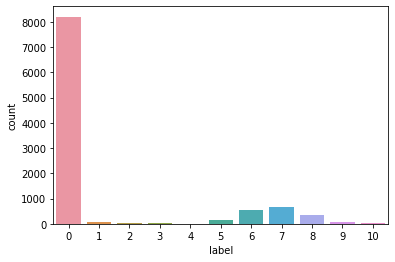

In [18]:
import seaborn as sns
graph = sns.countplot(data = total_df, x = 'label')

In [17]:
open_df = total_df[total_df['label'] == 7]
rest_df = total_df[total_df['label'] != 7]

In [19]:
len(open_df)

661

In [21]:
rest_df = rest_df.sample(frac=1)
new_rest_df = rest_df[:661]

In [33]:
final_df = pd.concat([open_df, new_rest_df])
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000120859,-0.06229,0.5590,0.31700,-0.21062,0.51349,0,0.6674,0.33571,0.1435,...,-0.46576,-0.17251,-0.19420,-0.58609,-0.21996,-0.12547,-0.12102,-0.41123,0.27638,0
1,90000385203,0.09323,0.1319,0.00932,-0.08344,0.58605,1,0.1181,0.08837,0.6138,...,-0.24683,0.01980,-0.07483,-0.23761,0.03354,0.02337,-0.00633,-0.23241,0.41052,0
2,90000015567,-0.01573,0.1109,-0.15468,0.05234,-0.25578,0,0.5574,-0.09227,0.8489,...,0.37334,0.04593,0.04282,0.49775,0.11784,-0.01090,0.01026,0.29931,-0.43453,7
3,90000083999,-0.06899,0.4354,-0.12813,0.03351,-0.24680,0,0.8118,-0.10546,0.7139,...,0.42489,0.01889,0.04615,0.41344,-0.01689,-0.04888,0.02953,0.44871,-0.28726,6
4,90000065366,0.00220,0.8911,0.50890,-0.33939,0.45904,0,0.5992,0.59816,0.1402,...,-0.57946,-0.27492,-0.30033,-0.65737,-0.29138,-0.12378,-0.25537,-0.34763,0.17475,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,90000099942,-0.01324,0.3293,0.02832,0.06282,0.02082,0,0.1911,-0.10557,0.4948,...,0.24062,0.08828,0.06415,0.25592,0.15301,0.00564,-0.00792,0.29166,-0.04138,7
1318,90000317326,-0.03265,0.7211,-0.05373,0.02180,0.19355,0,0.6128,-0.00553,0.7550,...,0.04648,0.00682,0.02240,-0.03135,0.01735,-0.02096,0.21229,0.12200,0.31431,0
1319,90000043643,-0.00229,0.3260,-0.13722,0.15209,0.35982,0,0.8842,-0.18357,0.3189,...,0.19812,0.06595,0.14123,0.10637,0.08923,0.14955,0.58752,-0.07026,0.03727,0
1320,90000356093,0.16962,0.1135,-0.11235,0.27870,0.05173,0,0.7418,-0.19911,0.4458,...,0.17557,0.06318,0.06432,0.48883,0.13672,0.30008,0.01513,0.13998,0.09635,7


In [34]:
final_df['label'] = final_df['label'].apply(lambda x: 1 if x==7 else 0)

In [35]:
final_df

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000120859,-0.06229,0.5590,0.31700,-0.21062,0.51349,0,0.6674,0.33571,0.1435,...,-0.46576,-0.17251,-0.19420,-0.58609,-0.21996,-0.12547,-0.12102,-0.41123,0.27638,0
1,90000385203,0.09323,0.1319,0.00932,-0.08344,0.58605,1,0.1181,0.08837,0.6138,...,-0.24683,0.01980,-0.07483,-0.23761,0.03354,0.02337,-0.00633,-0.23241,0.41052,0
2,90000015567,-0.01573,0.1109,-0.15468,0.05234,-0.25578,0,0.5574,-0.09227,0.8489,...,0.37334,0.04593,0.04282,0.49775,0.11784,-0.01090,0.01026,0.29931,-0.43453,1
3,90000083999,-0.06899,0.4354,-0.12813,0.03351,-0.24680,0,0.8118,-0.10546,0.7139,...,0.42489,0.01889,0.04615,0.41344,-0.01689,-0.04888,0.02953,0.44871,-0.28726,0
4,90000065366,0.00220,0.8911,0.50890,-0.33939,0.45904,0,0.5992,0.59816,0.1402,...,-0.57946,-0.27492,-0.30033,-0.65737,-0.29138,-0.12378,-0.25537,-0.34763,0.17475,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,90000099942,-0.01324,0.3293,0.02832,0.06282,0.02082,0,0.1911,-0.10557,0.4948,...,0.24062,0.08828,0.06415,0.25592,0.15301,0.00564,-0.00792,0.29166,-0.04138,1
1318,90000317326,-0.03265,0.7211,-0.05373,0.02180,0.19355,0,0.6128,-0.00553,0.7550,...,0.04648,0.00682,0.02240,-0.03135,0.01735,-0.02096,0.21229,0.12200,0.31431,0
1319,90000043643,-0.00229,0.3260,-0.13722,0.15209,0.35982,0,0.8842,-0.18357,0.3189,...,0.19812,0.06595,0.14123,0.10637,0.08923,0.14955,0.58752,-0.07026,0.03727,0
1320,90000356093,0.16962,0.1135,-0.11235,0.27870,0.05173,0,0.7418,-0.19911,0.4458,...,0.17557,0.06318,0.06432,0.48883,0.13672,0.30008,0.01513,0.13998,0.09635,1


In [36]:
final_df.to_csv('wrangled.csv')

In [37]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [38]:
df = final_df.copy()

In [39]:
X = df.drop(['label'], axis = 1)
Y = df['label']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
PCA_df = pd.concat([PCA_df, df['label']], axis = 1)
PCA_df['label'] = LabelEncoder().fit_transform(PCA_df['label'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,label
0,17.974971,2.005443,-2.964428,3.831866,-0.093855,0
1,11.732694,-6.421699,-0.361368,-3.319325,2.225454,0
2,-11.738905,4.612392,3.899151,-0.754158,1.899500,1
3,-9.073265,4.799305,-2.002638,-3.209111,0.905333,0
4,20.518475,9.367520,-0.830263,3.409582,-3.527933,0


In [43]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [48]:
pca = PCA(n_components=5,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

[88.27585199 19.56580448 17.69213219 12.16812907  7.92468798]
1.6551149999999986
[[151  43]
 [ 51 152]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       194
           1       0.78      0.75      0.76       203

    accuracy                           0.76       397
   macro avg       0.76      0.76      0.76       397
weighted avg       0.76      0.76      0.76       397

